In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns 

In [38]:
# Load the data
#360 ticks per second, frequency = 360 Hz
data = pd.read_csv('100.csv')


In [39]:
data_106 = pd.read_csv('106.csv')
data_114 = pd.read_csv('114.csv')
data_119 = pd.read_csv('119.csv')

In [40]:
m = data.shape[0]
n = data.shape[1]
print('Number of rows: ', m)
print('Number of columns: ', n)


Number of rows:  650000
Number of columns:  4


In [41]:
# Plot the data
columns = data.columns
columns_106 = data_106.columns
columns_114 = data_114.columns
columns_119 = data_119.columns

print(columns)
print(columns_106)
print(columns_114)
print(columns_119)

Index(['Unnamed: 0', 'time_ms', 'MLII', 'V5'], dtype='object')
Index(['Unnamed: 0', 'time_ms', 'MLII', 'V1'], dtype='object')
Index(['Unnamed: 0', 'time_ms', 'V5', 'MLII'], dtype='object')
Index(['Unnamed: 0', 'time_ms', 'MLII', 'V1'], dtype='object')


In [59]:
mean1 = np.mean(data[columns[2]])
mean2 = np.mean(data[columns[3]])

var1 = np.var(data[columns[2]])
var2 = np.var(data[columns[3]])

std1 = np.std(data[columns[2]])
std2 = np.std(data[columns[3]])

print('Mean: ', mean1)
print('Variance: ', var1)
print('Standard deviation: ', std1)

print('Mean: ', mean2)
print('Variance: ', var2)
print('Standard deviation: ', std2)


Mean:  -0.3062989769230769
Variance:  0.037326063082030236
Standard deviation:  0.19319954213721688
Mean:  -0.19103443076923085
Variance:  0.021967159876060596
Standard deviation:  0.14821322436294473


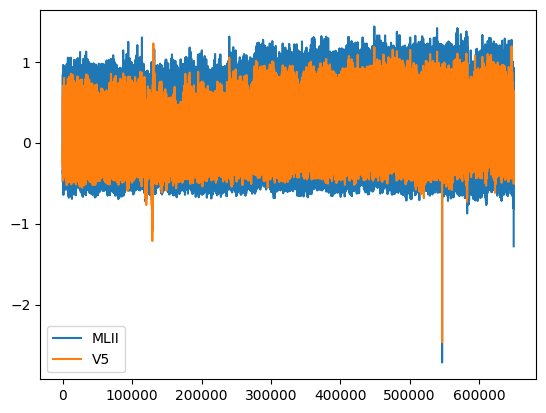

In [56]:
for i in range(2, n):
    plt.plot(data[columns[0]], data[columns[i]], label=columns[i])
plt.legend()


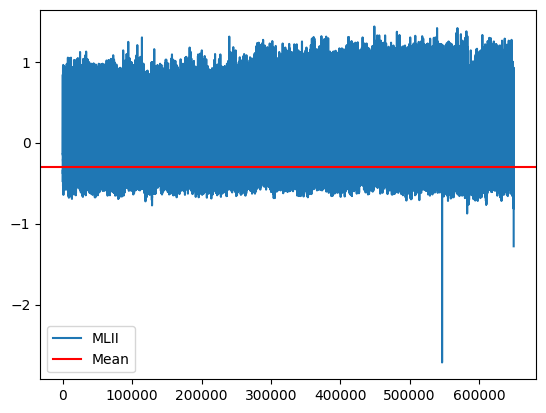

In [60]:
plt.plot(data[columns[0]], data[columns[2]], label=columns[2])
plt.axhline(y=mean1, color='r', linestyle='-', label='Mean')
plt.legend()


C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


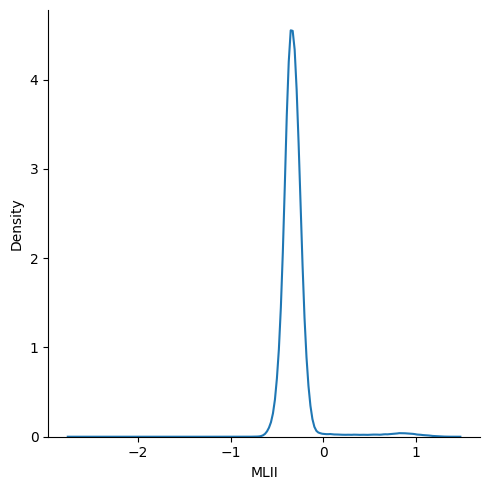

In [61]:
sns.displot(data[columns[2]],kind='kde')

C:\Users\Vedant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


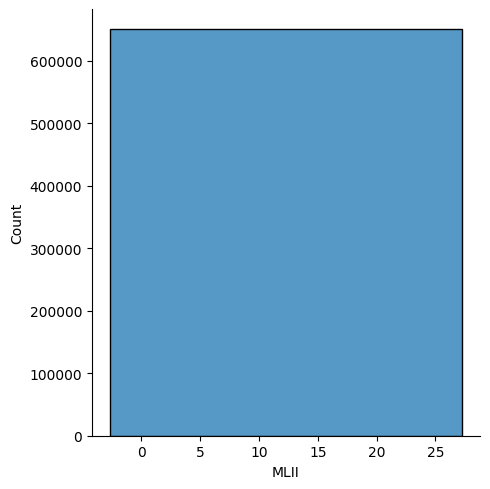

In [62]:
sns.displot(data[columns[2]], binwidth=30)

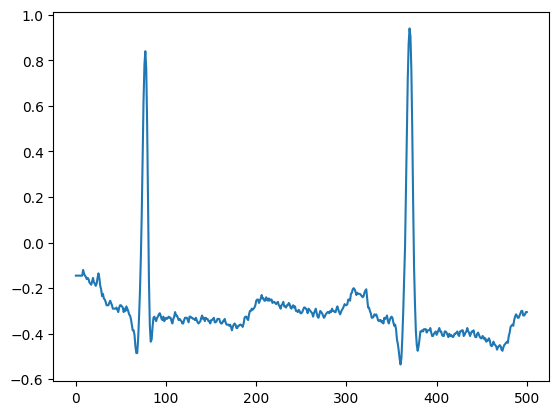

In [68]:
subset_data = data[columns[2]].loc[0:500]
plt.figure()
plt.plot(subset_data, label=columns[2])


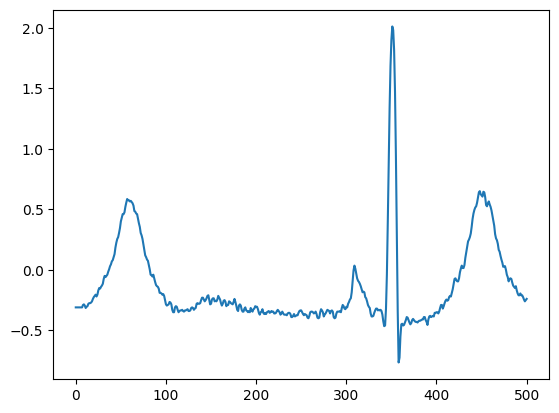

In [71]:
subset_data_106 = data_106[columns_106[2]].loc[0:500]
plt.figure()
plt.plot(subset_data_106, label=columns_106[2])

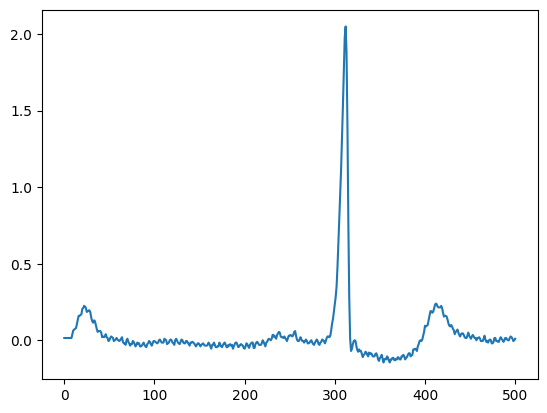

In [72]:
subset_data_114 = data_114[columns_114[3]].loc[0:500]
plt.figure()
plt.plot(subset_data_114, label=columns_114[3])

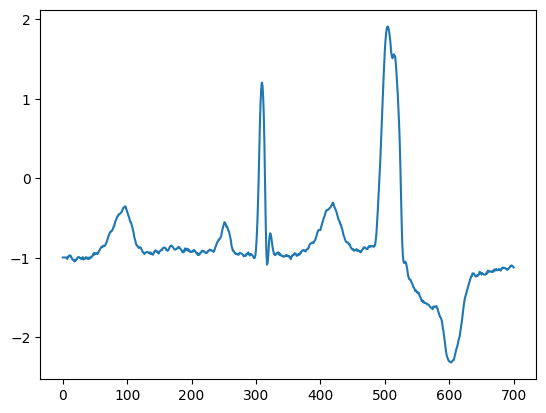

In [74]:
subset_data_119 = data_119[columns_119[2]].loc[0:700]
plt.figure()
plt.plot(subset_data_119, label=columns_119[2])

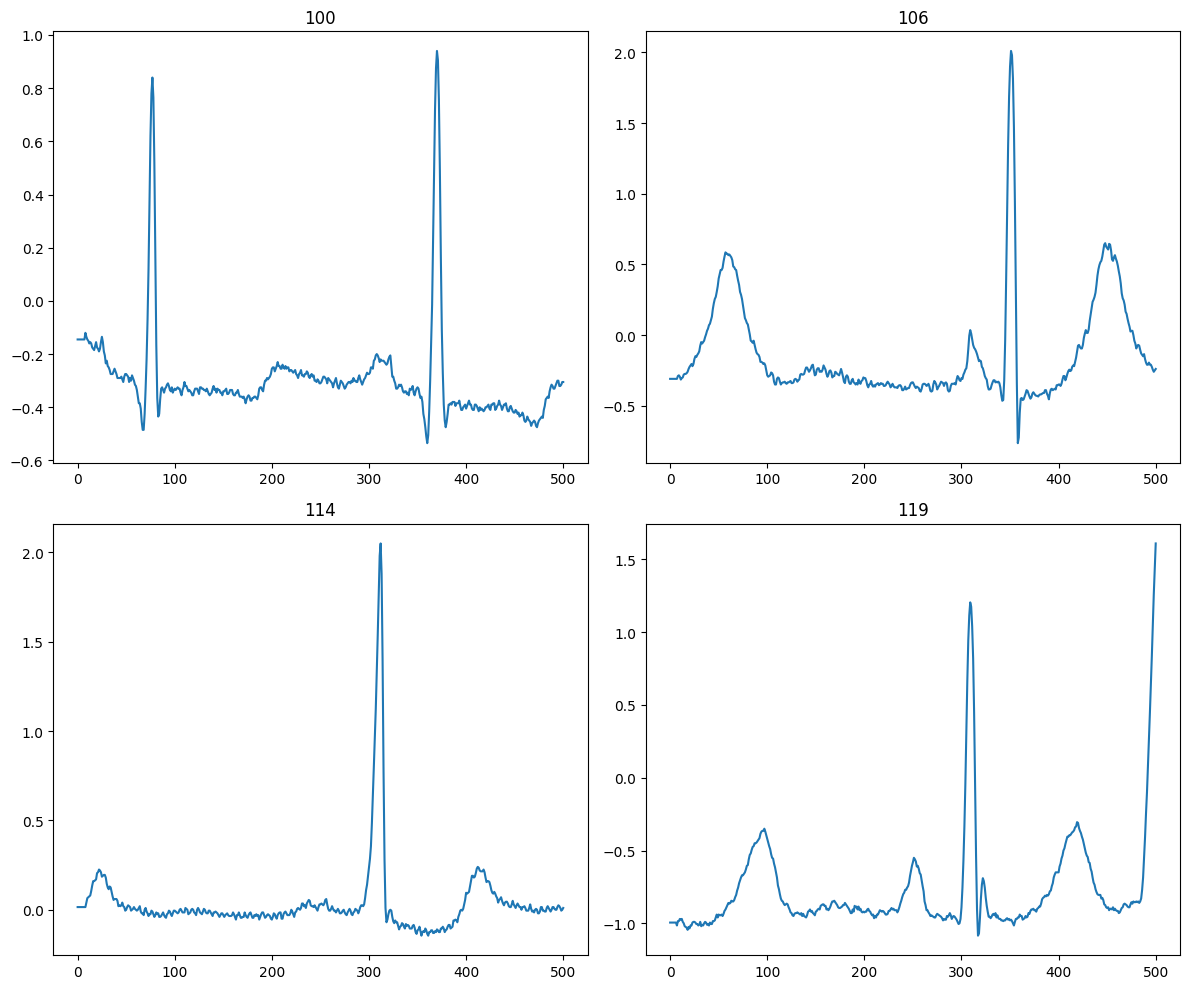

In [80]:

# Data
x = np.linspace(0, 500, 501)
subset_data = data[columns[2]].loc[0:500]
subset_data_106 = data_106[columns_106[2]].loc[0:500]
subset_data_114 = data_114[columns_114[3]].loc[0:500]
subset_data_119 = data_119[columns_119[2]].loc[0:500]

# Create figure and axes with adjusted dimensions
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot data on each subplot
axs[0, 0].plot(x, subset_data)
axs[0, 0].set_title('100')

axs[0, 1].plot(x, subset_data_106)
axs[0, 1].set_title('106')

axs[1, 0].plot(x, subset_data_114)
axs[1, 0].set_title('114')

axs[1, 1].plot(x, subset_data_119)
axs[1, 1].set_title('119')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()



In [69]:
import biosppy.signals.ecg as ecg
# Load your ECG signal data into the `signal` variable
signal = data[columns[2]].loc[0:21000]
# Example: signal = np.loadtxt('ecg_data.txt')

# Perform ECG analysis to detect R-peaks
ecg_analysis = ecg.ecg(signal=signal, sampling_rate=1000, show=False)

# Get R-peak locations
rpeaks = ecg_analysis['rpeaks']

# Initialize empty list to store P-wave durations
p_wave_durations = []

# Loop through each R-peak to calculate P-wave duration
for i in range(len(rpeaks) - 1):
    # Define the search range around the R-peak
    search_start = rpeaks[i]  # Start of the search range
    search_end = rpeaks[i + 1] if i + 1 < len(rpeaks) else len(signal) - 1  # End of the search range (next R-peak or end of signal)

    # Find the maximum positive slope within the search range (P-wave onset)
    p_wave_onset = np.argmax(np.diff(signal[search_start:search_end])) + search_start

    # Find the minimum negative slope within the search range (P-wave offset)
    p_wave_offset = np.argmin(np.diff(signal[search_start:search_end])) + search_start

    # Ensure p_wave_onset comes before p_wave_offset
    if p_wave_onset > p_wave_offset:
        p_wave_onset, p_wave_offset = p_wave_offset, p_wave_onset

    # Calculate the time interval between P-wave onset and offset (P-wave duration)
    p_wave_duration = (p_wave_offset - p_wave_onset) / 1000  # Convert to seconds (assuming sampling rate is in Hz)

    # Append the absolute value of P-wave duration to the list
    p_wave_durations.append(abs(p_wave_duration))

# Print the average P-wave duration
print("Average P-wave duration:", np.mean(p_wave_durations), "seconds")


Average P-wave duration: 0.28646376811594204 seconds


In [70]:
signal_106 = data_106[columns[2]].loc[0:21000]
# Example: signal = np.loadtxt('ecg_data.txt')

# Perform ECG analysis to detect R-peaks
ecg_analysis = ecg.ecg(signal=signal_106, sampling_rate=1000, show=False)

# Get R-peak locations
rpeaks = ecg_analysis['rpeaks']

# Initialize empty list to store P-wave durations
p_wave_durations = []

# Loop through each R-peak to calculate P-wave duration
for i in range(len(rpeaks) - 1):
    # Define the search range around the R-peak
    search_start = rpeaks[i]  # Start of the search range
    search_end = rpeaks[i + 1] if i + 1 < len(rpeaks) else len(signal_106) - 1  # End of the search range (next R-peak or end of signal)

    # Find the maximum positive slope within the search range (P-wave onset)
    p_wave_onset = np.argmax(np.diff(signal_106[search_start:search_end])) + search_start

    # Find the minimum negative slope within the search range (P-wave offset)
    p_wave_offset = np.argmin(np.diff(signal_106[search_start:search_end])) + search_start

    # Ensure p_wave_onset comes before p_wave_offset
    if p_wave_onset > p_wave_offset:
        p_wave_onset, p_wave_offset = p_wave_offset, p_wave_onset
        
    # Calculate the time interval between P-wave onset and offset (P-wave duration)
    p_wave_duration = (p_wave_offset - p_wave_onset) / 1000  # Convert to seconds (assuming sampling rate is in Hz)

    # Append the absolute value of P-wave duration to the list
    p_wave_durations.append(abs(p_wave_duration))

# Print the average P-wave duration
print("Average P-wave duration:", np.mean(p_wave_durations), "seconds")

Average P-wave duration: 0.3088253968253968 seconds


In [76]:
signal_114 = data_114[columns[2]].loc[0:21000]
# Example: signal = np.loadtxt('ecg_data.txt')

# Perform ECG analysis to detect R-peaks
ecg_analysis = ecg.ecg(signal=signal_114, sampling_rate=1000, show=False)

# Get R-peak locations
rpeaks = ecg_analysis['rpeaks']

# Initialize empty list to store P-wave durations
p_wave_durations = []

# Loop through each R-peak to calculate P-wave duration
for i in range(len(rpeaks) - 1):
    # Define the search range around the R-peak
    search_start = rpeaks[i]  # Start of the search range
    search_end = rpeaks[i + 1] if i + 1 < len(rpeaks) else len(signal_114) - 1  # End of the search range (next R-peak or end of signal)

    # Find the maximum positive slope within the search range (P-wave onset)
    p_wave_onset = np.argmax(np.diff(signal_114[search_start:search_end])) + search_start

    # Find the minimum negative slope within the search range (P-wave offset)
    p_wave_offset = np.argmin(np.diff(signal_114[search_start:search_end])) + search_start

    # Ensure p_wave_onset comes before p_wave_offset
    if p_wave_onset > p_wave_offset:
        p_wave_onset, p_wave_offset = p_wave_offset, p_wave_onset
        
    # Calculate the time interval between P-wave onset and offset (P-wave duration)
    p_wave_duration = (p_wave_offset - p_wave_onset) / 1000  # Convert to seconds (assuming sampling rate is in Hz)

    # Append the absolute value of P-wave duration to the list
    p_wave_durations.append(abs(p_wave_duration))

# Print the average P-wave duration
print("Average P-wave duration:", np.mean(p_wave_durations), "seconds")

Average P-wave duration: 0.20590000000000003 seconds


In [77]:
signal_119 = data_119[columns[2]].loc[0:21000]
# Example: signal = np.loadtxt('ecg_data.txt')

# Perform ECG analysis to detect R-peaks
ecg_analysis = ecg.ecg(signal=signal_119, sampling_rate=1000, show=False)

# Get R-peak locations
rpeaks = ecg_analysis['rpeaks']

# Initialize empty list to store P-wave durations
p_wave_durations = []

# Loop through each R-peak to calculate P-wave duration
for i in range(len(rpeaks) - 1):
    # Define the search range around the R-peak
    search_start = rpeaks[i]  # Start of the search range
    search_end = rpeaks[i + 1] if i + 1 < len(rpeaks) else len(signal_119) - 1  # End of the search range (next R-peak or end of signal)

    # Find the maximum positive slope within the search range (P-wave onset)
    p_wave_onset = np.argmax(np.diff(signal_119[search_start:search_end])) + search_start

    # Find the minimum negative slope within the search range (P-wave offset)
    p_wave_offset = np.argmin(np.diff(signal_119[search_start:search_end])) + search_start

    # Ensure p_wave_onset comes before p_wave_offset
    if p_wave_onset > p_wave_offset:
        p_wave_onset, p_wave_offset = p_wave_offset, p_wave_onset
        
    # Calculate the time interval between P-wave onset and offset (P-wave duration)
    p_wave_duration = (p_wave_offset - p_wave_onset) / 1000  # Convert to seconds (assuming sampling rate is in Hz)

    # Append the absolute value of P-wave duration to the list
    p_wave_durations.append(abs(p_wave_duration))

# Print the average P-wave duration
print("Average P-wave duration:", np.mean(p_wave_durations), "seconds")

Average P-wave duration: 0.23826829268292682 seconds
